In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df1 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_max.csv')
df2 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_max.csv')


In [10]:
df1 = df1.iloc[:, 1:]
df2 = df2.iloc[:, 1:]

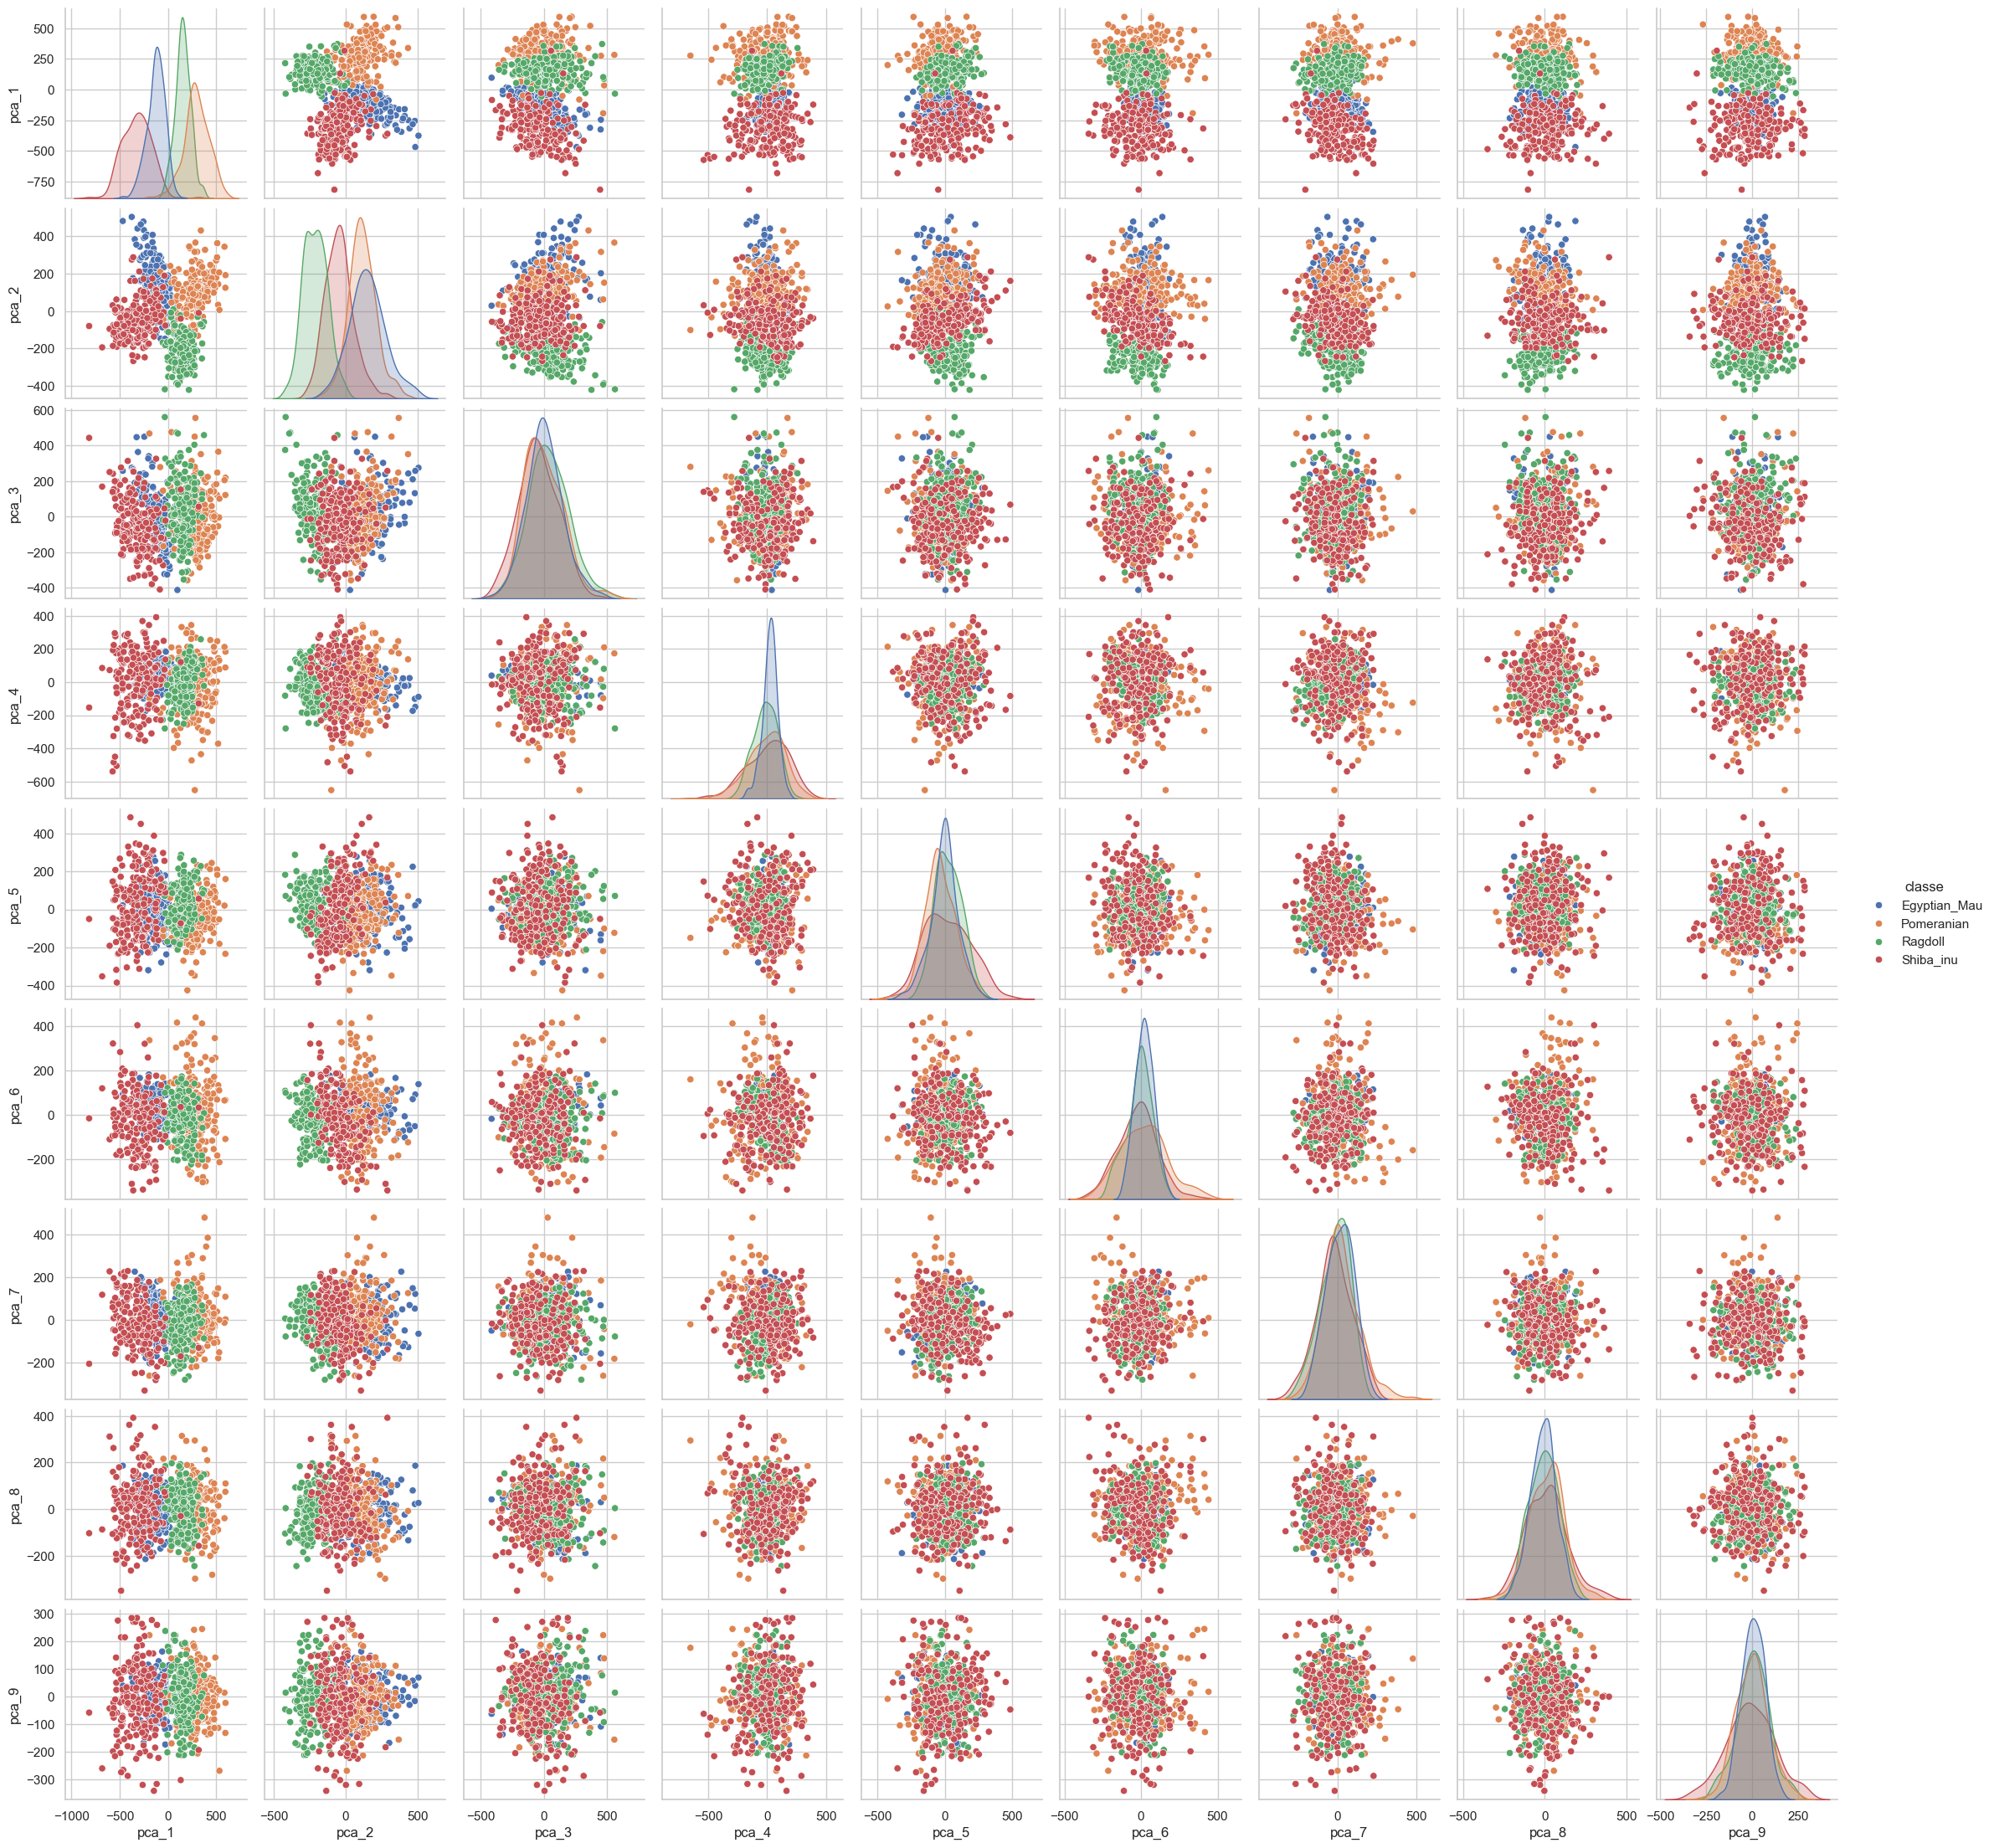

In [16]:
# Crie o pair plot
sns.pairplot(df1, hue='classe')
#plt.suptitle("Combinação entre componentes após PCA: PCA_CNN_VGG16_256_max", fontsize=16, y=1.02)  # y=1.02 para evitar sobreposição
plt.show()

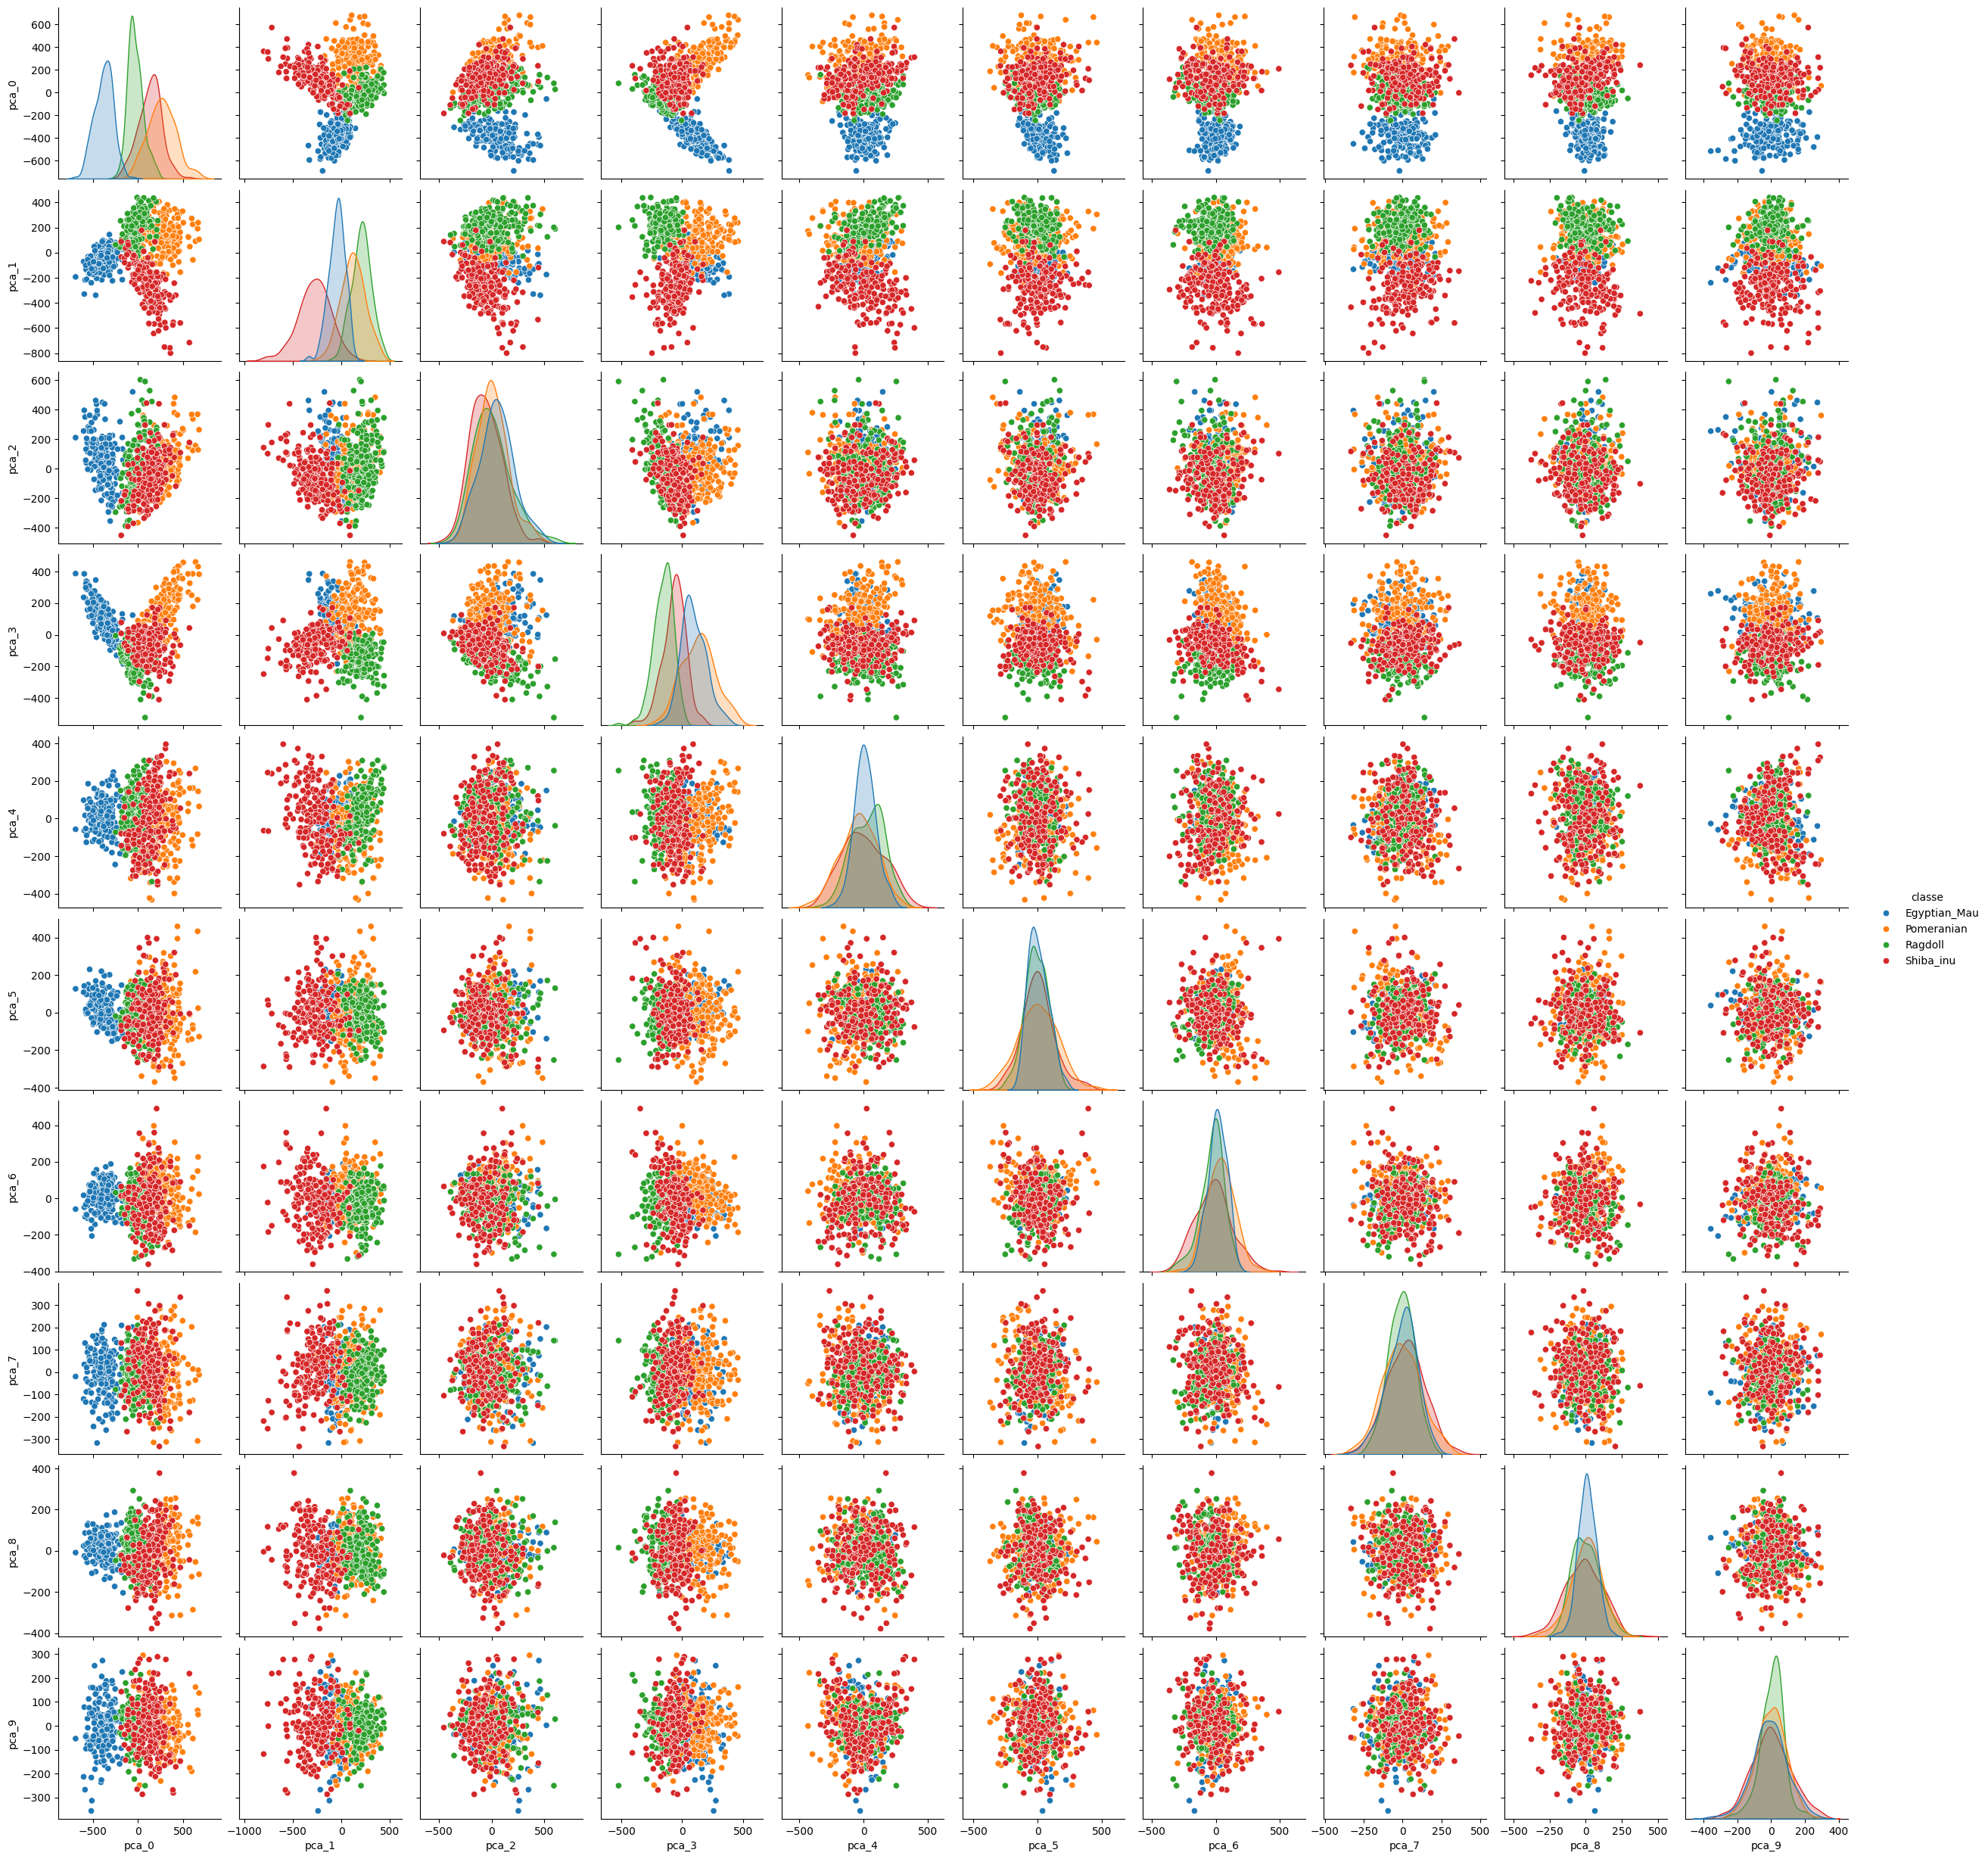

In [5]:
sns.pairplot(df2, hue='classe')
plt.show()

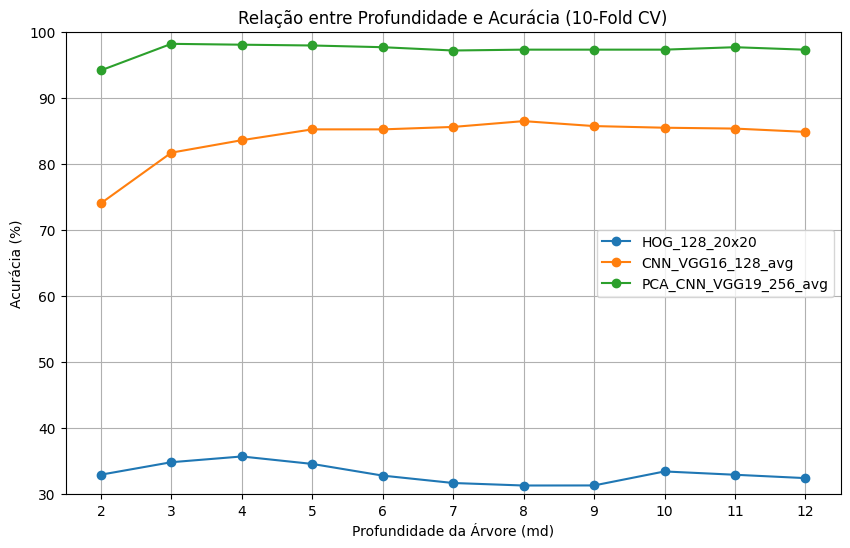

In [1]:
import matplotlib.pyplot as plt

# Profundidades
md = list(range(2, 13))

# Acurácias atualizadas
hog = [32.96, 34.85, 35.72, 34.59, 32.82, 31.70, 31.32, 31.33, 33.45, 32.95, 32.44]
cnn = [74.08, 81.75, 83.64, 85.28, 85.28, 85.65, 86.53, 85.78, 85.53, 85.40, 84.90]
pca_cnn = [94.22, 98.24, 98.11, 97.99, 97.73, 97.23, 97.36, 97.36, 97.36, 97.73, 97.35]

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plt.plot(md, hog, marker='o', label='HOG_128_20x20')
plt.plot(md, cnn, marker='o', label='CNN_VGG16_128_avg')
plt.plot(md, pca_cnn, marker='o', label='PCA_CNN_VGG19_256_avg')

# Configurações
plt.xlabel('Profundidade da Árvore (md)')
plt.ylabel('Acurácia (%)')
plt.title('Relação entre Profundidade e Acurácia (10-Fold CV)')
plt.grid(True)
plt.legend()
plt.xticks(md)
plt.ylim(30, 100)

plt.show()


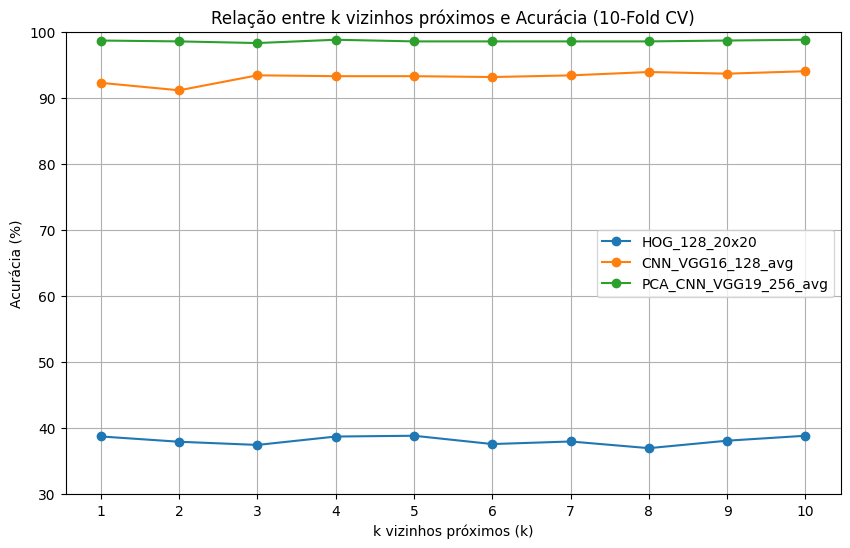

In [3]:
import matplotlib.pyplot as plt

# Profundidades
k = list(range(1, 11))

# Acurácias atualizadas
hog = [38.75, 37.95, 37.47,	38.74,	38.86,	37.60,	37.99, 36.98, 38.11, 38.86]
cnn = [92.33, 91.20, 93.47,	93.34,	93.34,	93.21,	93.46,	93.97,	93.72,	94.09]
pca_cnn = [98.74,	98.61,	98.36, 98.86,98.61,	98.61,	98.61,	98.61,	98.74,98.86]

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plt.plot(k, hog, marker='o', label='HOG_128_20x20')
plt.plot(k, cnn, marker='o', label='CNN_VGG16_128_avg')
plt.plot(k, pca_cnn, marker='o', label='PCA_CNN_VGG19_256_avg')

# Configurações
plt.xlabel('k vizinhos próximos (k)')
plt.ylabel('Acurácia (%)')
plt.title('Relação entre k vizinhos próximos e Acurácia (10-Fold CV)')
plt.grid(True)
plt.legend()
plt.xticks(k)
plt.ylim(30, 100)

plt.show()

C:\Users\lf060\AppData\Local\Temp\ipykernel_16556\3587761232.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Base', y='Média Experimentos (%)', data=df_bar, palette='Set2', width = 0.5)


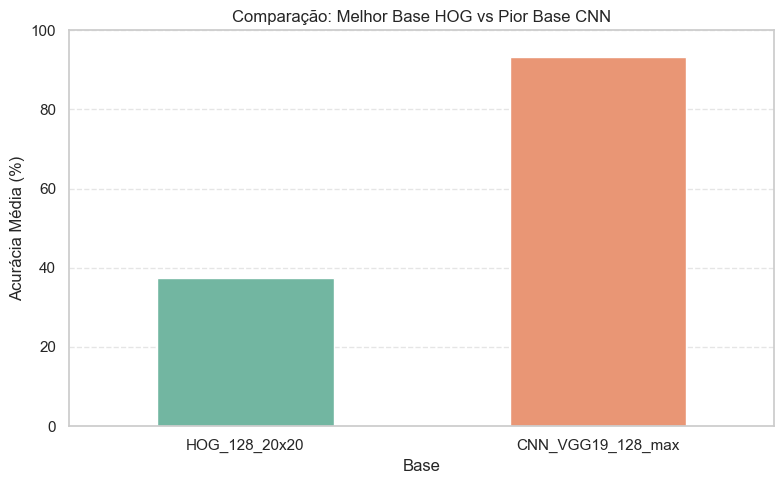

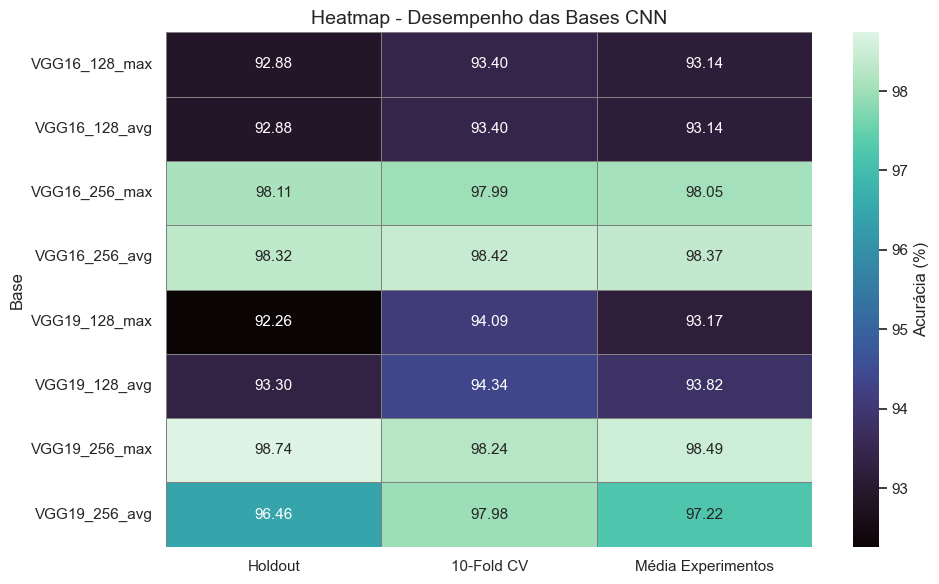

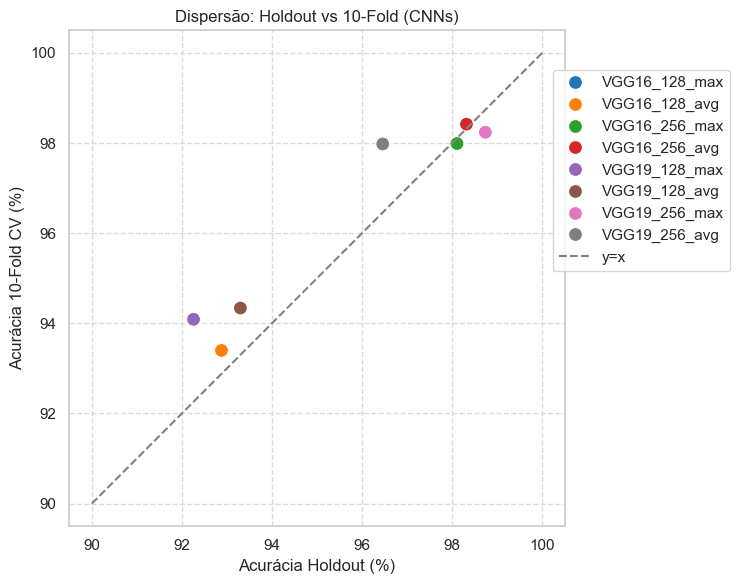

C:\Users\lf060\AppData\Local\Temp\ipykernel_16556\3587761232.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot_long, x='Base', y='Acurácia (%)', palette='Set3')


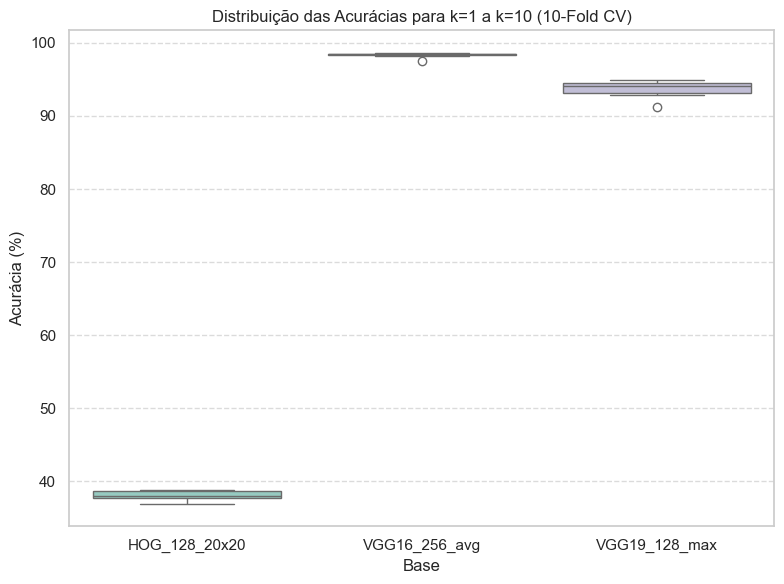

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# === GRÁFICO 1: Barra - Melhor HOG vs Pior CNN ===
data_bar = {
    'Base': ['HOG_128_20x20', 'CNN_VGG19_128_max'],
    'Média Experimentos (%)': [37.44, 93.14]
}
df_bar = pd.DataFrame(data_bar)
plt.figure(figsize=(8, 5))
sns.barplot(x='Base', y='Média Experimentos (%)', data=df_bar, palette='Set2', width = 0.5)
plt.title('Comparação: Melhor Base HOG vs Pior Base CNN')
plt.ylim(0, 100)
plt.ylabel('Acurácia Média (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === GRÁFICO 2: Heatmap CNNs ===
heatmap_data = {
    'Base': [
        'VGG16_128_max', 'VGG16_128_avg', 'VGG16_256_max', 'VGG16_256_avg',
        'VGG19_128_max', 'VGG19_128_avg', 'VGG19_256_max', 'VGG19_256_avg'
    ],
    'Holdout': [92.88, 92.88, 98.11, 98.32, 92.26, 93.30, 98.74, 96.46],
    '10-Fold CV': [93.40, 93.40, 97.99, 98.42, 94.09, 94.34, 98.24, 97.98],
    'Média Experimentos': [93.14, 93.14, 98.05, 98.37, 93.17, 93.82, 98.49, 97.22]
}
df_heatmap = pd.DataFrame(heatmap_data)
df_heatmap.set_index('Base', inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="mako", 
            cbar_kws={'label': 'Acurácia (%)'},
            annot_kws={'size': 11}, linewidths=0.5, linecolor='gray')
plt.title("Heatmap - Desempenho das Bases CNN", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === GRÁFICO 3: Dispersão Holdout vs 10-Fold ===
df_scatter = df_heatmap.reset_index()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scatter, x='Holdout', y='10-Fold CV', hue='Base', s=100, palette='tab10')
plt.plot([90, 100], [90, 100], linestyle='--', color='gray', label='y=x')
plt.title('Dispersão: Holdout vs 10-Fold (CNNs)')
plt.xlabel('Acurácia Holdout (%)')
plt.ylabel('Acurácia 10-Fold CV (%)')
plt.legend(loc='lower right', bbox_to_anchor=(1.35, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === GRÁFICO 4: Boxplot k=1 a k=10 ===
boxplot_data = {
    'HOG_128_20x20': [38.75, 37.95, 37.47, 38.74, 38.86, 37.60, 37.99, 36.98, 38.11, 38.86],
    'VGG16_256_avg': [98.48, 97.48, 98.36, 98.48, 98.36, 98.23, 98.48, 98.61, 98.23, 98.48],
    'VGG19_128_max': [92.84, 91.20, 92.96, 93.84, 94.09, 94.47, 94.09, 94.59, 94.85, 94.34]
}
df_boxplot = pd.DataFrame(boxplot_data)
df_boxplot_long = df_boxplot.melt(var_name='Base', value_name='Acurácia (%)')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_boxplot_long, x='Base', y='Acurácia (%)', palette='Set3')
plt.title('Distribuição das Acurácias para k=1 a k=10 (10-Fold CV)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


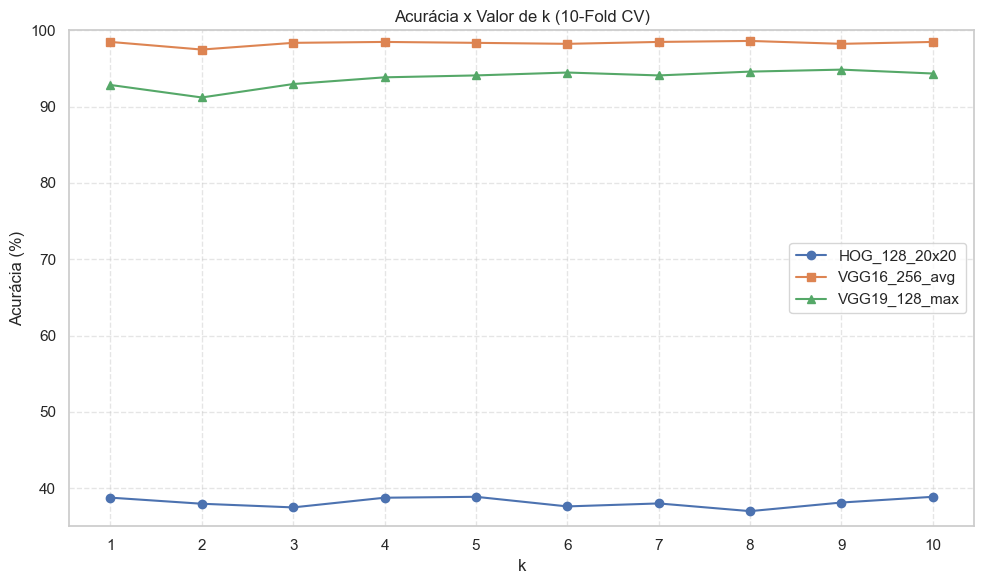

In [5]:
import matplotlib.pyplot as plt

# Dados de acurácia (10-Fold CV) de k=1 até k=10
k = list(range(1, 11))
hog = [38.75, 37.95, 37.47, 38.74, 38.86, 37.60, 37.99, 36.98, 38.11, 38.86]
vgg16 = [98.48, 97.48, 98.36, 98.48, 98.36, 98.23, 98.48, 98.61, 98.23, 98.48]
vgg19 = [92.84, 91.20, 92.96, 93.84, 94.09, 94.47, 94.09, 94.59, 94.85, 94.34]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k, hog, marker='o', label='HOG_128_20x20')
plt.plot(k, vgg16, marker='s', label='VGG16_256_avg')
plt.plot(k, vgg19, marker='^', label='VGG19_128_max')

plt.title('Acurácia x Valor de k (10-Fold CV)')
plt.xlabel('k')
plt.ylabel('Acurácia (%)')
plt.ylim(35, 100)
plt.xticks(k)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


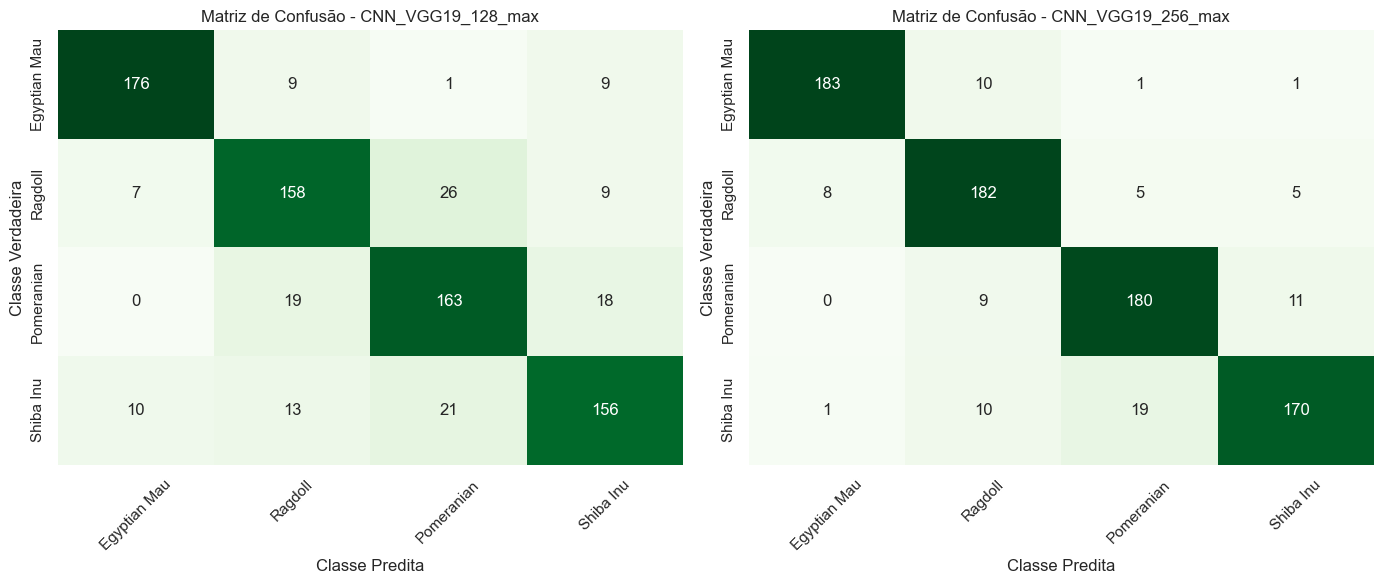

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matrizes de confusão originais
cm_128 = np.array([[176,   1,   9,   9],
                   [  0, 163,  19,  18],
                   [  7,  26, 158,   9],
                   [ 10,  21,  13, 156]])

cm_256 = np.array([[183,   1,  10,   1],
                   [  0, 180,   9,  11],
                   [  8,   5, 182,   5],
                   [  1,  19,  10, 170]])

# Função para reordenar as matrizes: troca linhas/colunas 1 e 2
def reorder_confusion_matrix(cm):
    idx = [0, 2, 1, 3]  # nova ordem: 0, 2, 1, 3
    return cm[np.ix_(idx, idx)]

# Reordenar
cm_128_reordered = reorder_confusion_matrix(cm_128)
cm_256_reordered = reorder_confusion_matrix(cm_256)

# Novos labels
labels = ['Egyptian Mau', 'Ragdoll', 'Pomeranian', 'Shiba Inu']

# Função para plotar
def plot_confusion_matrix(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Classe Predita')
    ax.set_ylabel('Classe Verdadeira')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# Plotar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_confusion_matrix(cm_128_reordered, 'Matriz de Confusão - CNN_VGG19_128_max', axes[0])
plot_confusion_matrix(cm_256_reordered, 'Matriz de Confusão - CNN_VGG19_256_max', axes[1])

plt.tight_layout()
plt.show()


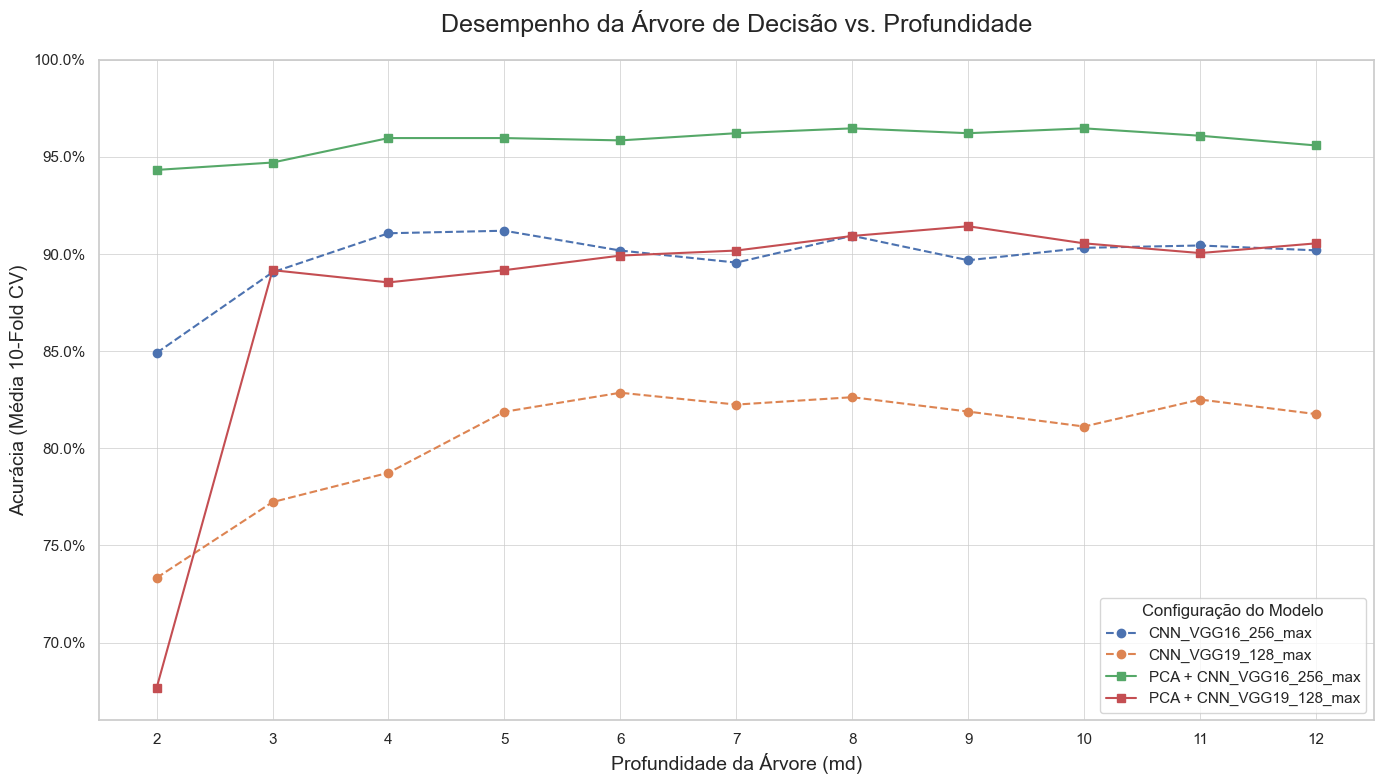

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# 1. Transcrever os dados das linhas "10-Fold CV" da sua tabela
#    (Converti as porcentagens para valores decimais, ex: 84.91% -> 0.8491)
data = {
    'profundidade': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'CNN VGG16 256': [0.8491, 0.8906, 0.9107, 0.9120, 0.9018, 0.8956, 0.9094, 0.8968, 0.9032, 0.9044, 0.9019],
    'CNN VGG19 128': [0.7333, 0.7723, 0.7874, 0.8188, 0.8286, 0.8225, 0.8263, 0.8189, 0.8112, 0.8251, 0.8176],
    'PCA + CNN VGG16 256': [0.9433, 0.9471, 0.9597, 0.9597, 0.9585, 0.9622, 0.9647, 0.9622, 0.9647, 0.9609, 0.9559],
    'PCA + CNN VGG19 128': [0.6766, 0.8917, 0.8854, 0.8917, 0.8992,0.9018, 0.9093, 0.9143, 0.9055, 0.9005, 0.9055]
}

# 2. Criar um DataFrame do pandas
df = pd.DataFrame(data)

# 3. Configurar o estilo do gráfico para uma melhor visualização
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8)) # Define o tamanho do gráfico

# 4. Plotar cada linha do DataFrame
#    'marker="o"' adiciona um círculo em cada ponto de dado para facilitar a leitura
plt.plot(df['profundidade'], df['CNN VGG16 256'], marker='o', linestyle='--', label='CNN_VGG16_256_max')
plt.plot(df['profundidade'], df['CNN VGG19 128'], marker='o', linestyle='--', label='CNN_VGG19_128_max')
plt.plot(df['profundidade'], df['PCA + CNN VGG16 256'], marker='s', linestyle='-', label='PCA + CNN_VGG16_256_max')
plt.plot(df['profundidade'], df['PCA + CNN VGG19 128'], marker='s', linestyle='-', label='PCA + CNN_VGG19_128_max')

# 5. Customizar o gráfico (Títulos, Legendas, etc.)
plt.title('Desempenho da Árvore de Decisão vs. Profundidade', fontsize=18, pad=20)
plt.xlabel('Profundidade da Árvore (md)', fontsize=14)
plt.ylabel('Acurácia (Média 10-Fold CV)', fontsize=14)
plt.xticks(df['profundidade']) # Garante que todos os valores de profundidade apareçam no eixo X
plt.legend(title='Configuração do Modelo', fontsize=11) # Adiciona a legenda para identificar as linhas
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# 6. Formatar o eixo Y para mostrar porcentagens
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=1))
plt.ylim(0.66, 1.0) # Ajusta o limite do eixo Y para dar zoom na área de interesse

# 7. Exibir o gráfico
plt.tight_layout() # Ajusta o layout para evitar que os rótulos se sobreponham
plt.show()

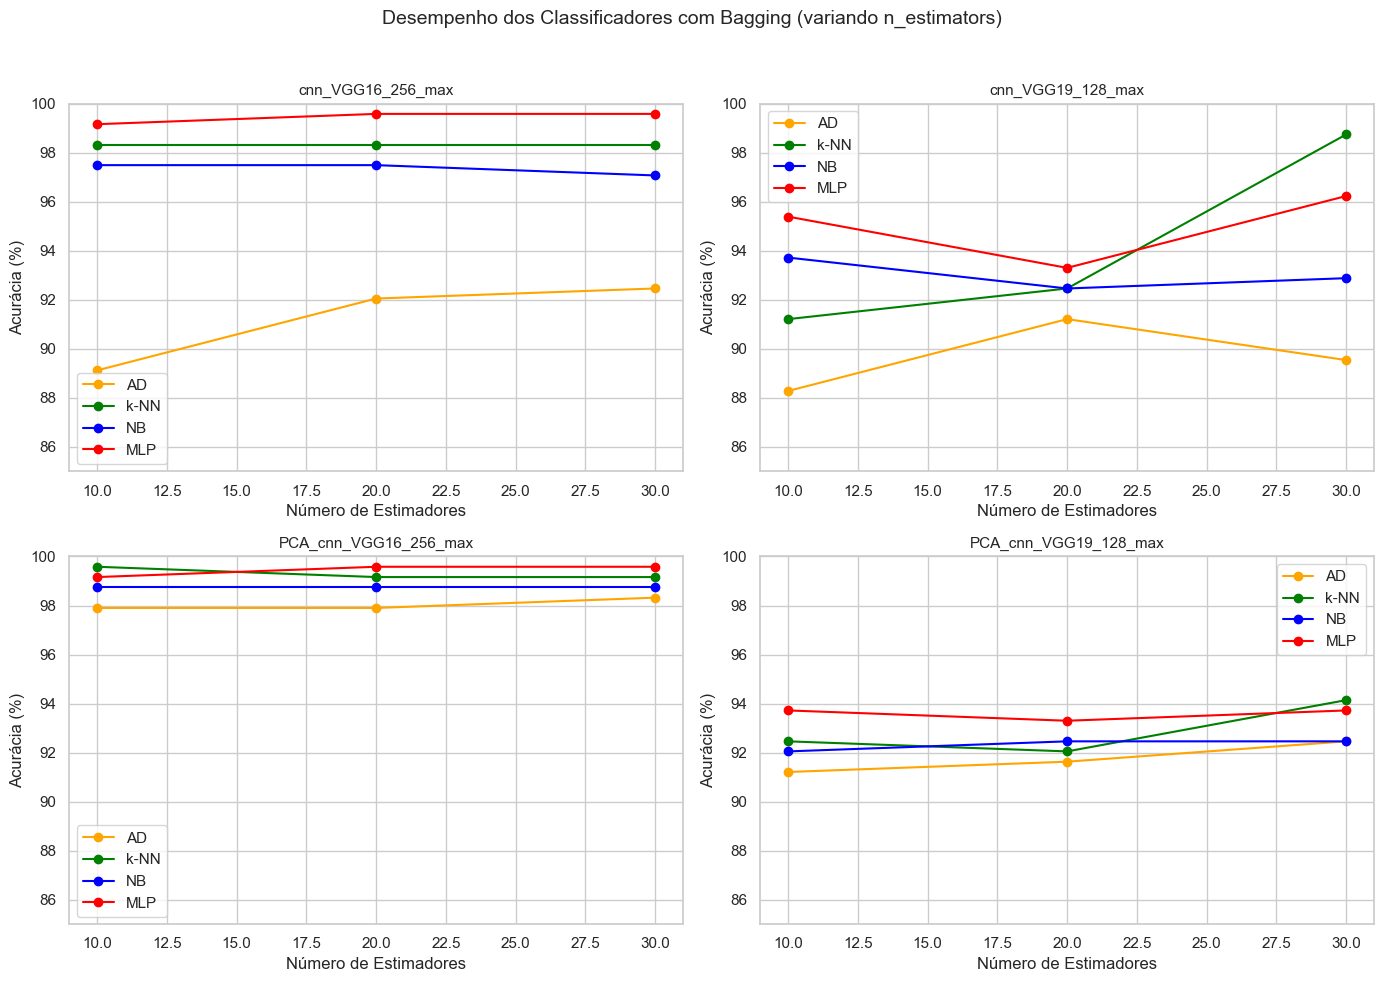

In [27]:
import matplotlib.pyplot as plt

# Nomes dos datasets
datasets = [
    'cnn_VGG16_256_max',
    'cnn_VGG19_128_max',
    'PCA_cnn_VGG16_256_max',
    'PCA_cnn_VGG19_128_max'
]

# Número de estimadores
estimators = [10, 20, 30]

# Acurácias para cada classificador e dataset
data = {
    'cnn_VGG16_256_max': {
        'AD': [89.12, 92.05, 92.46],
        'k-NN': [98.32, 98.32, 98.32],
        'NB': [97.49, 97.49, 97.07],
        'MLP': [99.16, 99.58, 99.58]
    },
    'cnn_VGG19_128_max': {
        'AD': [88.28, 91.21, 89.54],
        'k-NN': [91.21, 92.46, 98.74],
        'NB': [93.72, 92.46, 92.88],
        'MLP': [95.39, 93.30, 96.23]
    },
    'PCA_cnn_VGG16_256_max': {
        'AD': [97.90, 97.90, 98.32],
        'k-NN': [99.58, 99.16, 99.16],
        'NB': [98.74, 98.74, 98.74],
        'MLP': [99.16, 99.58, 99.58]
    },
    'PCA_cnn_VGG19_128_max': {
        'AD': [91.21, 91.63, 92.46],
        'k-NN': [92.46, 92.05, 94.14],
        'NB': [92.05, 92.46, 92.46],
        'MLP': [93.72, 93.30, 93.72]
    }
}

# Cores para os classificadores
colors = {
    'AD': 'orange',
    'k-NN': 'green',
    'NB': 'blue',
    'MLP': 'red'
}

# Plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, dataset in enumerate(datasets):
    ax = axs[idx]
    for clf in data[dataset]:
        ax.plot(estimators, data[dataset][clf], marker='o', label=clf, color=colors[clf])
    ax.set_title(f'{dataset}', fontsize=11)
    ax.set_xlabel('Número de Estimadores')
    ax.set_ylabel('Acurácia (%)')
    ax.set_ylim(85, 100)
    ax.grid(True)
    ax.legend()

plt.suptitle('Desempenho dos Classificadores com Bagging (variando n_estimators)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


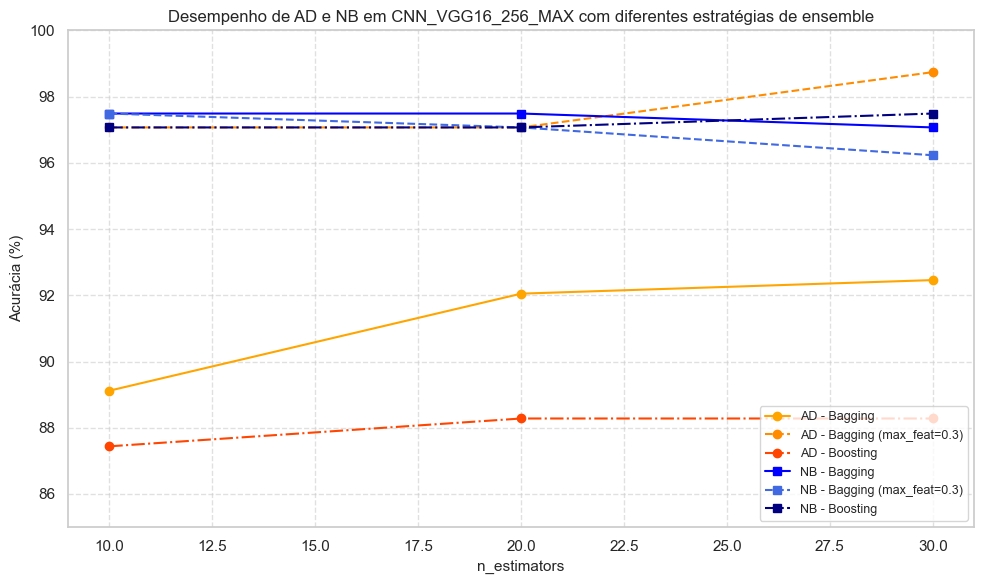

In [28]:
import matplotlib.pyplot as plt

# Eixo x
n_estimators = [10, 20, 30]

# CNN_VGG16_256_MAX - Bagging
ad_bagging = [89.12, 92.05, 92.46]
nb_bagging = [97.49, 97.49, 97.07]

# CNN_VGG16_256_MAX - max_features = 0.3 - Bagging
ad_bagging_feat03 = [97.07, 97.07, 98.74]
nb_bagging_feat03 = [97.49, 97.07, 96.23]

# CNN_VGG16_256_MAX - Boosting
ad_boosting = [87.44, 88.28, 88.28]
nb_boosting = [97.07, 97.07, 97.49]

# Plot
plt.figure(figsize=(10, 6))

# AD
plt.plot(n_estimators, ad_bagging, marker='o', label='AD - Bagging', color='orange')
plt.plot(n_estimators, ad_bagging_feat03, marker='o', label='AD - Bagging (max_feat=0.3)', linestyle='--', color='darkorange')
plt.plot(n_estimators, ad_boosting, marker='o', label='AD - Boosting', linestyle='-.', color='orangered')

# NB
plt.plot(n_estimators, nb_bagging, marker='s', label='NB - Bagging', color='blue')
plt.plot(n_estimators, nb_bagging_feat03, marker='s', label='NB - Bagging (max_feat=0.3)', linestyle='--', color='royalblue')
plt.plot(n_estimators, nb_boosting, marker='s', label='NB - Boosting', linestyle='-.', color='navy')

# Estética
plt.title('Desempenho de AD e NB em CNN_VGG16_256_MAX com diferentes estratégias de ensemble', fontsize=12)
plt.xlabel('n_estimators', fontsize=11)
plt.ylabel('Acurácia (%)', fontsize=11)
plt.ylim(85, 100)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=9)
plt.tight_layout()

plt.show()


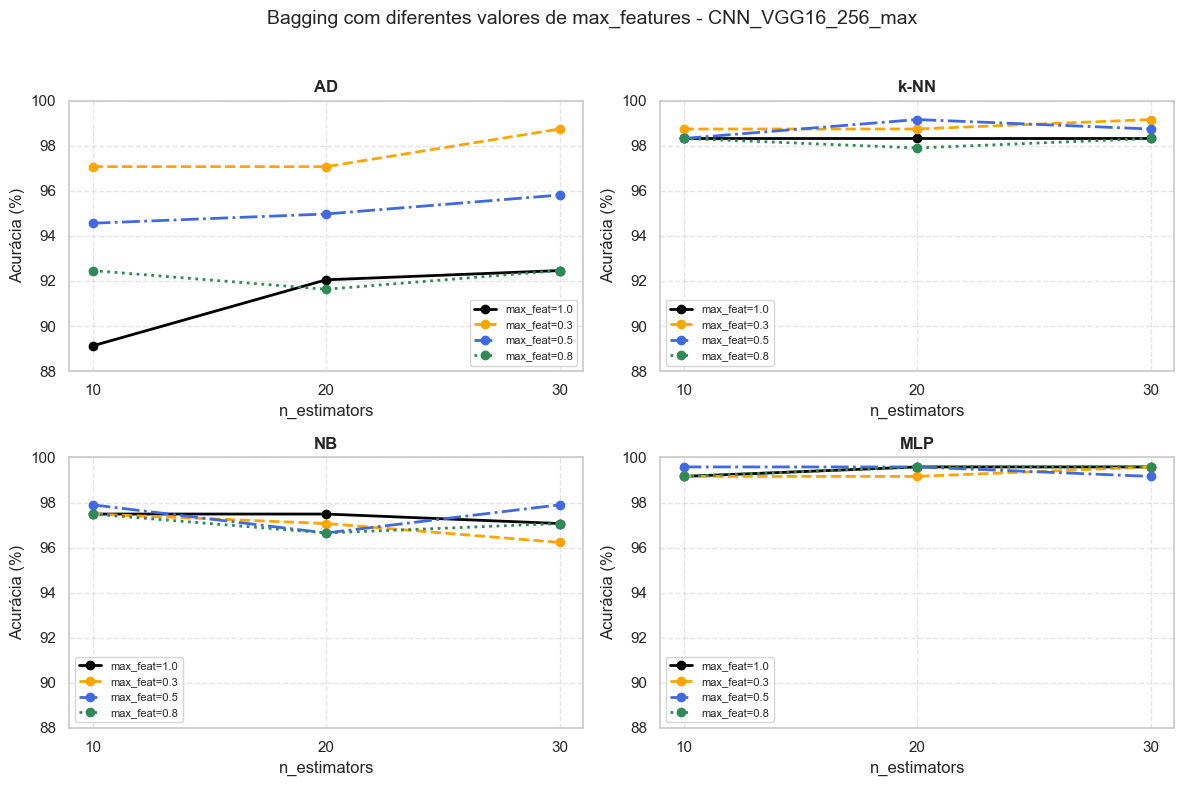

In [30]:
import matplotlib.pyplot as plt

estimators = [10, 20, 30]

# Dados por classificador
dados = {
    'AD': {
        '1.0': [89.12, 92.05, 92.46],
        '0.3': [97.07, 97.07, 98.74],
        '0.5': [94.56, 94.97, 95.81],
        '0.8': [92.46, 91.63, 92.46],
    },
    'k-NN': {
        '1.0': [98.32, 98.32, 98.32],
        '0.3': [98.74, 98.74, 99.16],
        '0.5': [98.32, 99.16, 98.74],
        '0.8': [98.32, 97.90, 98.32],
    },
    'NB': {
        '1.0': [97.49, 97.49, 97.07],
        '0.3': [97.49, 97.07, 96.23],
        '0.5': [97.90, 96.65, 97.90],
        '0.8': [97.49, 96.65, 97.07],
    },
    'MLP': {
        '1.0': [99.16, 99.58, 99.58],
        '0.3': [99.16, 99.16, 99.58],
        '0.5': [99.58, 99.58, 99.16],
        '0.8': [99.16, 99.58, 99.58],
    },
}

colors = {
    '1.0': 'black',
    '0.3': 'orange',
    '0.5': 'royalblue',
    '0.8': 'seagreen',
}

linestyles = {
    '1.0': '-',
    '0.3': '--',
    '0.5': '-.',
    '0.8': ':',
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for idx, (clf, config) in enumerate(dados.items()):
    for feat, acc in config.items():
        axs[idx].plot(
            estimators, acc, label=f'max_feat={feat}',
            color=colors[feat], linestyle=linestyles[feat],
            marker='o', linewidth=2
        )
    
    axs[idx].set_title(f'{clf}', fontsize=12, fontweight='bold')
    axs[idx].set_xlabel('n_estimators')
    axs[idx].set_ylabel('Acurácia (%)')
    axs[idx].set_xticks(estimators)
    axs[idx].set_ylim(88, 100)
    axs[idx].grid(True, linestyle='--', alpha=0.5)
    axs[idx].legend(fontsize=8)

fig.suptitle('Bagging com diferentes valores de max_features - CNN_VGG16_256_max', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


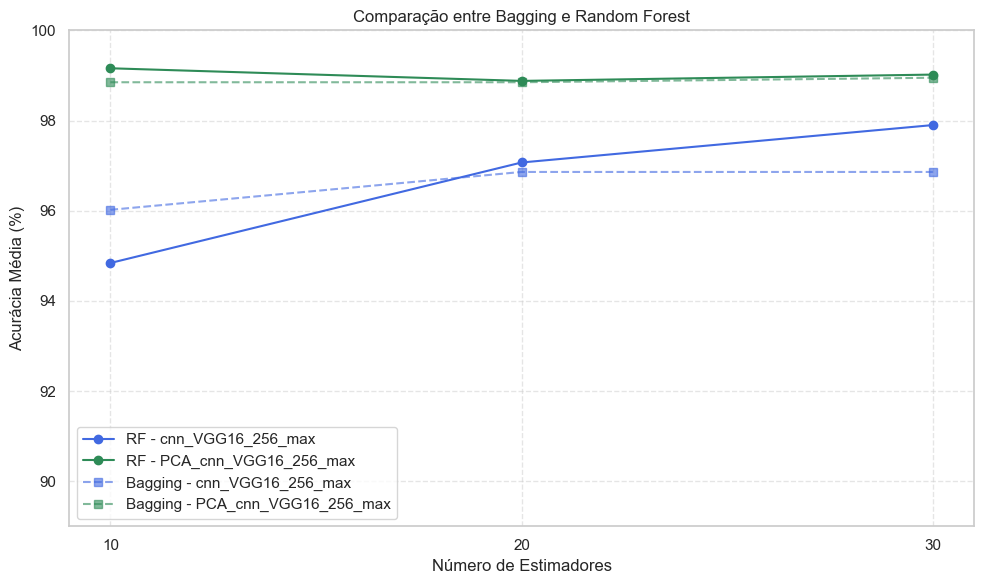

In [32]:
import matplotlib.pyplot as plt

# Estimadores (limite até 30)
estimators = [10, 20, 30]

# Dados - Média dos classificadores (até 30)
bagging_cnn = [96.02, 96.86, 96.86]
bagging_pca = [98.85, 98.85, 98.95]

rf_cnn = [94.84, 97.07, 97.90]
rf_pca = [99.16, 98.88, 99.02]

# Plot
plt.figure(figsize=(10, 6))

# Random Forest
plt.plot(estimators, rf_cnn, label='RF - cnn_VGG16_256_max', marker='o', linestyle='-', color='royalblue')
plt.plot(estimators, rf_pca, label='RF - PCA_cnn_VGG16_256_max', marker='o', linestyle='-', color='seagreen')

# Bagging
plt.plot(estimators, bagging_cnn, label='Bagging - cnn_VGG16_256_max', marker='s', linestyle='--', color='royalblue', alpha=0.6)
plt.plot(estimators, bagging_pca, label='Bagging - PCA_cnn_VGG16_256_max', marker='s', linestyle='--', color='seagreen', alpha=0.6)

plt.title('Comparação entre Bagging e Random Forest')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia Média (%)')
plt.ylim(89, 100)
plt.xticks(estimators)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


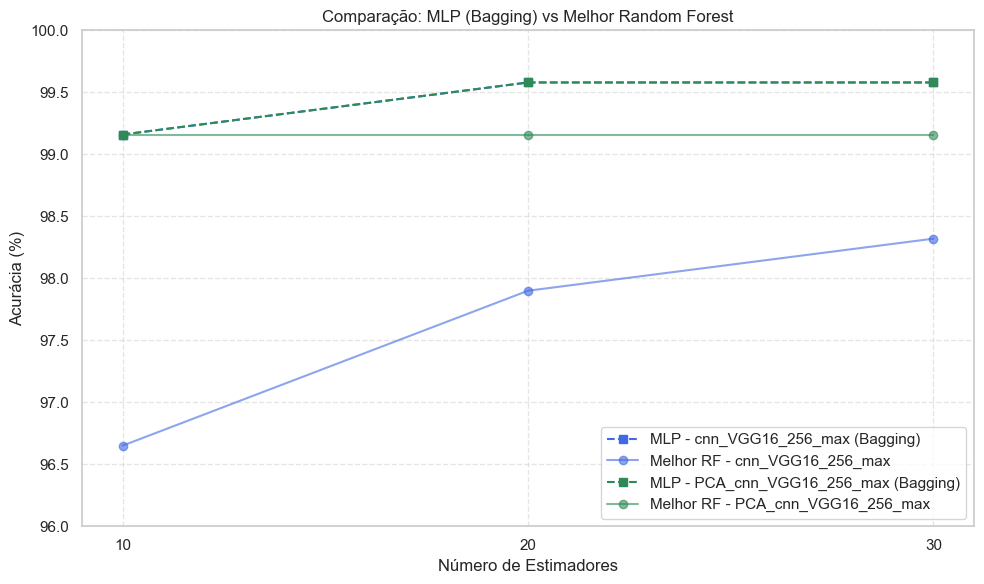

In [33]:
import matplotlib.pyplot as plt

# Estimadores
estimators = [10, 20, 30]

# MLP (Bagging)
mlp_cnn = [99.16, 99.58, 99.58]
mlp_pca = [99.16, 99.58, 99.58]

# Melhor Random Forest por estimador
rf_best_cnn = [96.65, 97.90, 98.32]
rf_best_pca = [99.16, 99.16, 99.16]

# Plot
plt.figure(figsize=(10, 6))

# cnn_VGG16_256_max
plt.plot(estimators, mlp_cnn, label='MLP - cnn_VGG16_256_max (Bagging)', marker='s', linestyle='--', color='royalblue')
plt.plot(estimators, rf_best_cnn, label='Melhor RF - cnn_VGG16_256_max', marker='o', linestyle='-', color='royalblue', alpha=0.6)

# PCA_cnn_VGG16_256_max
plt.plot(estimators, mlp_pca, label='MLP - PCA_cnn_VGG16_256_max (Bagging)', marker='s', linestyle='--', color='seagreen')
plt.plot(estimators, rf_best_pca, label='Melhor RF - PCA_cnn_VGG16_256_max', marker='o', linestyle='-', color='seagreen', alpha=0.6)

plt.title('Comparação: MLP (Bagging) vs Melhor Random Forest')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia (%)')
plt.xticks(estimators)
plt.ylim(96, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


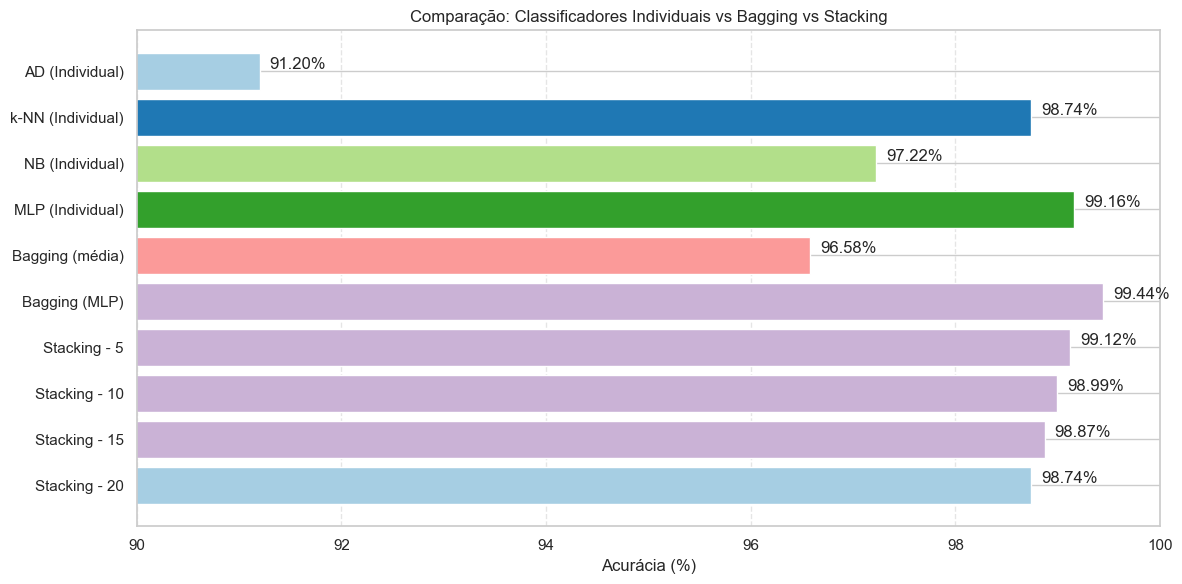

In [36]:
import matplotlib.pyplot as plt

# Estratégias
estrategias = [
    "AD (Individual)",
    "k-NN (Individual)",
    "NB (Individual)",
    "MLP (Individual)",
    "Bagging (média)",
    "Bagging (MLP)",
    "Stacking - 5",
    "Stacking - 10",
    "Stacking - 15",
    "Stacking - 20"
]

# Acurácias correspondentes
acuracias = [
    91.20,
    98.74,
    97.22,
    99.16,
    (96.02 + 96.86 + 96.86) / 3,# Bagging média
    99.44,
    99.12,
    98.99,
    98.87,
    98.74
]

# Cores diferentes por grupo
colors = [
    "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c",  # Individual
    "#fb9a99",                                   # Bagging
    "#cab2d6", "#cab2d6", "#cab2d6", "#cab2d6"    # Stacking
]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(estrategias, acuracias, color=colors)
plt.xlabel("Acurácia (%)")
plt.title("Comparação: Classificadores Individuais vs Bagging vs Stacking")
plt.xlim(90, 100)

# Adiciona valores no final das barras
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + 0.25,
             f"{bar.get_width():.2f}%", va='center')

plt.tight_layout()
plt.gca().invert_yaxis()  # Melhor visualização top-down
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
